In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
house = pd.read_csv("C:/Users/Marcy/Desktop/data sets/Housing Data/train.csv")
test =  pd.read_csv("C:/Users/Marcy/Desktop/data sets/Housing Data/test.csv")

#### I will need 
pandas for loading in data, numpy for square-rooting your model estimates, sklearn for the bulk of the linear regression and modeling work, and matplotlib to graph the model's residuals to get a visual representation of accuracy.

#### check 
column names, unique values in each column of house dataset

In [2]:
for column in house.columns:
    print('Column: {} - Unique Values: {}'.format(column, house[column].unique()))

Column: Id - Unique Values: [   1    2    3 ... 1458 1459 1460]
Column: MSSubClass - Unique Values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Column: MSZoning - Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column: LotFrontage - Unique Values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Column: LotArea - Unique Values: [ 8450  9600 11250 ... 17217 13175  9717]
Column: Street - Unique Values: ['Pave' 'Grvl']
Column: Alley - Unique Values: [nan 'Grvl' 'Pave

#### There are 79 independent variables, or predictor variables.

#### Checking missing values and data types

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1460 observations and 81 columns. With the zero index, there's 79 IV, with column 80 held as the dependent variable.

#### Some of the year built columns are ordinal, but appear as integers in the data: columns 19(YearBuilt), 20 (YearRemodAdd), 59 (GarageYrBlt) and 77 (YrSold) 

#### There are missing values for Alley, PoolQC, Fence, MiscFeature. This makes sense, as not every house will have a pool or a fence. But the values must be dropped or addressed - use fillna(0) - will this introduce multicollinearity?

In [4]:
house.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Go through each column with missing values and determine best solution. drop columns or rows/ or replace missing values with another value w/ df['column'].fillna(0)

In [5]:
pd.set_option("display.max_rows",90)
house.isna().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#house.isnull().sum()

#### Drop columns 
which have no bearing on house prices, such as ID, or the analysis, such as which neighborhood the house is in, or whether it has an alley. PoolQC, or quality is redundant with PoolArea.

In [7]:
house.drop(columns= ['Id', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'MasVnrArea', 'BsmtExposure', 'PoolQC', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'Fence'], axis=1, inplace=True)

#### Time to encode the categorical data with levels 
- pandas get_dummies makes the data frame too large and bloated with binary values for all of the levels inside the different columns for house qualities. First I'll drop the columns unncessary for my purposes here, then recode the objects using sklearn, with a short and easy for loop, rather than deal with some 45 column names. 

In [8]:
house.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
list1= house.select_dtypes("O")
list_objects = []
for i in list1:
    list_objects.append(i)
    
    
    
for i in list_objects:
    house[i] = le.fit_transform(house[i])

In [10]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice
0,60,3,65.0,8450,1,4,0,5,7,5,...,2,0,61,0,0,0,0,0,4,208500
1,20,3,80.0,9600,1,2,0,2,6,8,...,2,298,0,0,0,0,0,0,4,181500
2,60,3,68.0,11250,1,4,0,5,7,5,...,2,0,42,0,0,0,0,0,4,223500
3,70,3,60.0,9550,1,0,0,5,7,5,...,2,0,35,272,0,0,0,0,0,140000
4,60,3,84.0,14260,1,2,0,5,8,5,...,2,192,84,0,0,0,0,0,4,250000


In [11]:
house.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotConfig          0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageCars   

#### x is all independent variables; y is the single column SalePrice.

## fill lot frontage with mean

In [12]:
house['LotFrontage'].mean()


70.04995836802665

In [49]:
house['LotFrontage'] = house['LotFrontage'].fillna(value=70.05)

In [50]:
house[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',  'BsmtQual', 'BsmtCond',  'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageQual', 'GarageCond']] = house[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea' , 'BsmtQual', 'BsmtCond',  'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageQual', 'GarageCond']].fillna(value=0)

#### Check and make sure fillna worked

In [51]:
house['LotFrontage'].isna().sum()

0

In [16]:
house.isna().sum()  ##Why isn't it working?##

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotConfig          0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageCars   

#### Saving recoded housing data to a csv file so it can be imported into R for further analysis.

In [17]:
y = house['SalePrice']
x = house.drop(['SalePrice'], axis=1)

In [18]:
house.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/house.csv', index=False)
x.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/x.csv', index=False) 
y.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/y.csv',index=False)

In [19]:
#Pearson Correlation Heatmap
house.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice
MSSubClass,1.0,0.036,-0.39,-0.14,-0.025,0.076,0.75,0.4,0.033,-0.059,0.028,0.041,-0.12,-0.031,-0.089,-0.14,-0.033,-0.017,-0.0033,0.058,-0.037,-0.0095,0.018,-0.07,0.042,-0.066,-0.14,-0.24,0.048,0.021,-0.1,0.052,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.01,0.04,0.0037,-0.046,0.058,-0.04,-0.099,0.037,0.037,-0.06,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.025,-0.084
MSZoning,0.036,1.0,-0.11,-0.034,0.088,-0.0099,0.0057,-0.11,-0.16,0.19,-0.31,-0.17,-0.0003,0.0051,-0.0086,0.007,-0.049,0.2,-0.096,-0.24,0.13,-0.007,0.025,-0.049,-0.029,0.028,-0.047,-0.088,0.057,0.13,-0.05,-0.071,-0.056,-0.051,0.012,-0.083,-0.019,0.0072,-0.2,-0.13,-0.016,0.049,0.13,-0.043,-0.096,-0.011,0.017,-0.16,-0.19,-0.12,-0.05,-0.1,-0.0095,-0.15,0.12,0.00036,0.019,-0.0031,0.0093,0.0095,-0.17
LotFrontage,-0.39,-0.11,1.0,0.43,-0.041,-0.21,-0.45,0.036,0.25,-0.059,0.12,0.089,0.17,0.096,0.081,0.11,-0.019,-0.2,0.053,0.11,-0.18,0.046,-0.03,0.23,-0.035,0.05,0.13,0.39,-0.023,-0.089,0.072,0.065,0.46,0.08,0.038,0.4,0.1,-0.0072,0.2,0.054,0.26,-0.0061,-0.2,0.35,0.033,0.27,-0.21,0.29,0.34,0.013,-0.00051,0.094,0.089,0.15,0.011,0.07,0.041,0.21,0.0034,0.063,0.35
LotArea,-0.14,-0.034,0.43,1.0,-0.2,-0.12,-0.21,-0.033,0.11,-0.0056,0.014,0.014,0.077,0.15,0.0043,-0.0039,-0.0049,-0.057,0.015,-0.011,-0.066,0.0073,-0.062,0.21,-0.071,0.11,-0.0026,0.26,0.028,0.0042,0.05,0.044,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,-0.057,0.19,-0.022,0.27,-0.15,0.15,0.18,-0.01,-0.0047,0.015,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.034,0.26
Street,-0.025,0.088,-0.041,-0.2,1.0,0.014,-0.018,0.024,0.059,0.043,0.021,0.065,-0.02,0.0081,0.0025,0.0062,0.011,0.05,0.0059,0.035,-0.026,-0.015,-0.012,-0.016,0.062,-0.038,0.035,0.0051,0.0079,-0.054,0.07,0.021,0.0059,0.047,0.0077,0.044,-0.051,0.015,0.046,0.028,0.029,0.014,-0.025,0.047,-0.016,-0.0053,-0.024,-0.02,-0.048,-0.024,-0.023,0.025,-0.018,-0.0057,0.023,0.0075,-0.033,0.0044,-0.023,0.0061,0.041
LotConfig,0.076,-0.0099,-0.21,-0.12,0.014,1.0,0.11,-0.033,-0.031,-0.031,0.014,-0.0052,-0.01,-0.068,0.023,0.0055,0.0029,-0.0025,0.035,-0.012,0.023,0.035,0.019,-0.024,0.0001,-0.01,-0.011,-0.04,-2.4e-05,-0.01,-0.0037,-0.025,-0.062,-0.052,-0.005,-0.089,-0.013,-0.0099,-0.0075,-0.026,-0.057,-0.0025,-0.01,-0.049,-0.021,-0.061,0.021,-0.067,-0.064,0.033,0.042,-0.045,-0.036,-0.055,-0.07,-0.03,-0.0047,-0.047,-0.018,0.052,-0.067
BldgType,0.75,0.0057,-0.45,-0.21,-0.018,0.11,1.0,0.067,0.05,-0.16,0.22,0.1,-0.054,-0.038,-0.11,-0.14,-0.028,-0.088,0.085,0.14,-0.097,0.041,-0.042,0.007,0.031,-0.017,-0.051,-0.05,0.0055,-0.01,0.018,0.074,-0.074,-0.084,-0.03,-0.13,0.052,-0.0034,0.071,-0.0076,-0.28,0.18,-0.025,-0.2,0.0096,-0.09,0.042,0.0074,-0.061,0.073,0.068,0.059,-0.013,-0.037,-0.11,-0.023,-0.028,-0.028,-0.0096,-0.0035,-0.086
HouseStyle,0.4,-0.11,0.036,-0.033,0.024,-0.033,0.067,1.0,0.22,-0.031,0.27,0.21,-0.033,0.045,-0.036,-0.071,-0.13,-0.093,0.068,0.19,-0.15,-0.0017,-0.056,0.011,-0.0066,-0.028,-0.14,-0.14,-0.075,-0.07,0.075,0.17,-0.17,0.48,-0.083,0.26,0.037,0.042,0.24,0.41,0.18,-0.0042,-0.083,0.25,0.052,0.1,-0.011,0.2,0.16,0.019,-0.028,0.12,0.088,0.14,-0.065,-0.027,-0.025,0.077,-0.041,0.023,0.18
OverallQual,0.033,-0.16,0.25,0.11,0.059,-0.031,0.05,0.22,1.0,-0.092,0.57,0.55,0.17,0.075,0.16,0.15,0.019,-0.63,0.14,0.4,-0.61,-0.0016,-0.0064,0.24,0.046,-0.059,0.31,0.54,-0.11,-0.43,0.27,0.25,0.48,0.3,-0.03,0.59

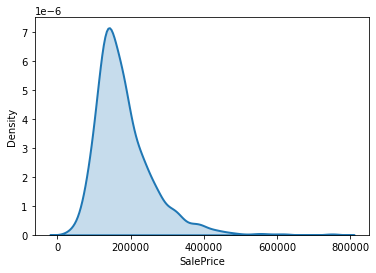

In [20]:
sns.kdeplot(x=house['SalePrice'], shade=True, linewidth=2);

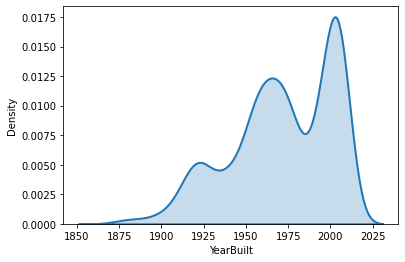

In [21]:
sns.kdeplot(x= house['YearBuilt' ] , shade=True, linewidth=2);

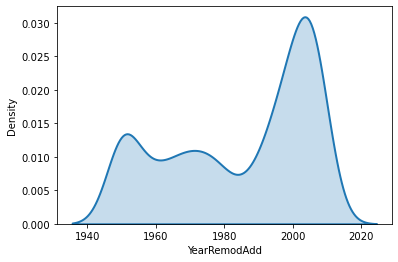

In [22]:
sns.kdeplot(x=house['YearRemodAdd'], shade=True, linewidth=2);

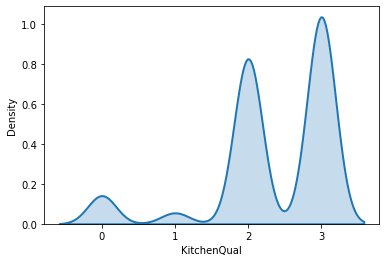

In [23]:
sns.kdeplot(x=house['KitchenQual'], shade=True, linewidth=2);

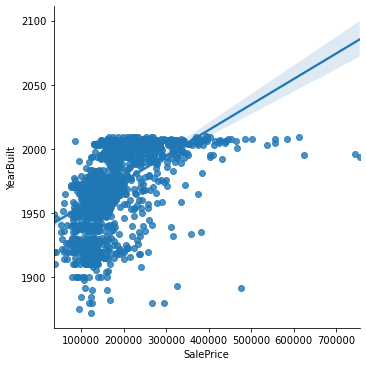

In [24]:
sns.lmplot(x="SalePrice", y="YearBuilt", data=house);

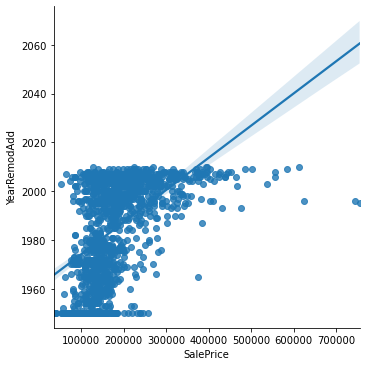

In [25]:
sns.lmplot(x="SalePrice", y="YearRemodAdd", data=house);

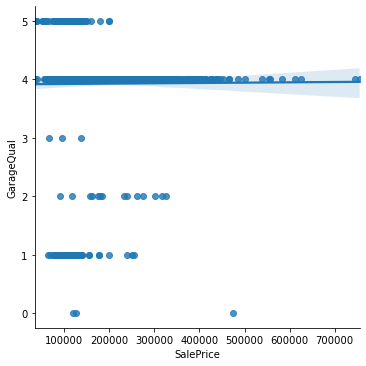

In [26]:
sns.lmplot(x="SalePrice", y="GarageQual", data=house);

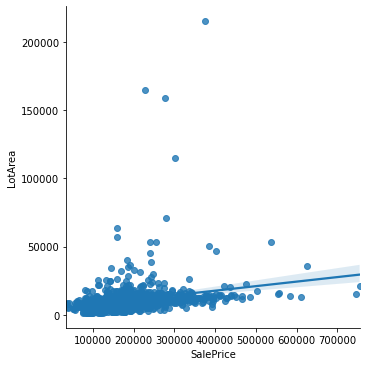

In [27]:
sns.lmplot(x="SalePrice", y="LotArea", data=house);

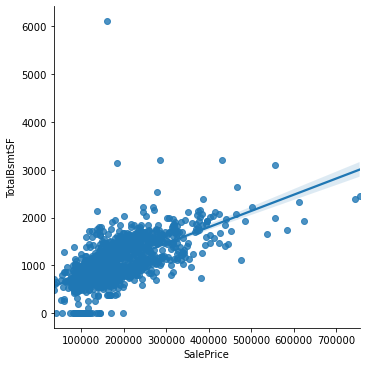

In [28]:
sns.lmplot(x="SalePrice", y="TotalBsmtSF", data=house);

In [54]:
#set sale price into ranges
def price_range(series):
    if series < 9999:
        return "0-10000"
    elif 10000 < series < 25000:
        return "10000-25000"
    elif 25000 < series < 50000:
        return "25000-50000"
    elif 50000 < series < 100000:
        return "50000-100000"
    elif 100000 < series < 150000:
        return "100000-150000"
    elif 150000 < series < 200000:
        return "150000-200000"
    elif 200000 < series < 300000:
        return "200000-300000"
    elif 300000 < series < 400000:
        return "300000-400000"
    elif 400000 < series < 500000:
        return "400000-500000"
    elif 500001 <= series:
        return "501000"

house['SalePriceRange'] = house['SalePrice'].apply(price_range)

house['SalePriceRange'].value_counts(sort=True)

100000-150000    492
150000-200000    406
200000-300000    312
50000-100000     109
300000-400000     87
400000-500000     19
501000             9
25000-50000        5
Name: SalePriceRange, dtype: int64

<AxesSubplot:>

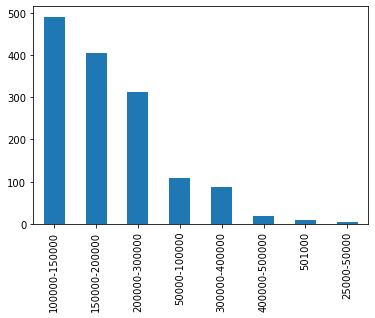

In [57]:
house['SalePriceRange'].value_counts(sort=True).plot(kind="bar")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

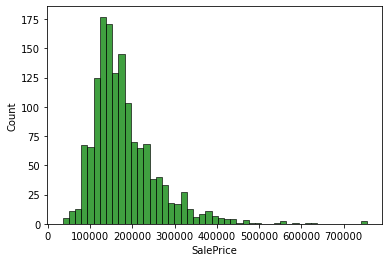

In [30]:
sns.histplot(x=house['SalePrice'], color='green')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

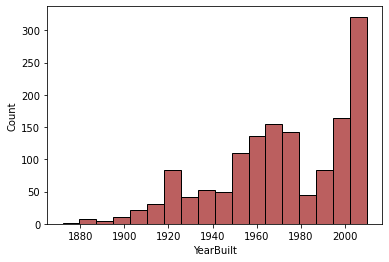

In [31]:
sns.histplot(x=house['YearBuilt'], color='brown')

#### During a recession in the early 1980s, it's easy to see there were no new houses being built. Conversely, during a boom after 2000, new housing starts took off. 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

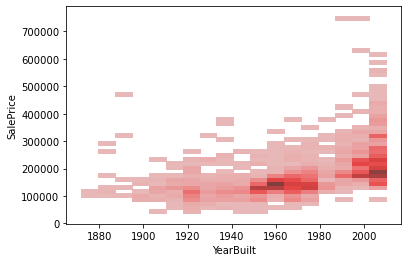

In [32]:
sns.histplot(x=house['YearBuilt'], y=house['SalePrice'], color='brown')

#### From a linear model and stepwise regression,
the top features that affect housing prices are in the following subset of housing data.

In [33]:
topFeatures = house [['OverallQual','GrLivArea','YearBuilt','OverallCond','LotArea']]

SecondsetTopFeatures = house [['FireplaceQu','RoofMatl','BldgType', 'KitchenQual','Functional','HeatingQC','ScreenPorch','SaleCondition','MSZoning','KitchenAbvGr','Street','WoodDeckSF','Fireplaces','BsmtQual','1stFlrSF','BsmtFinType1','FullBath','LotFrontage']]

In [34]:
#'BsmtFullBath', 'BsmtHalfBath', 'GarageCar' have null values after fillna.
SecondsetTopFeatures.isnull().sum()

FireplaceQu        0
RoofMatl           0
BldgType           0
KitchenQual        0
Functional         0
HeatingQC          0
ScreenPorch        0
SaleCondition      0
MSZoning           0
KitchenAbvGr       0
Street             0
WoodDeckSF         0
Fireplaces         0
BsmtQual           0
1stFlrSF           0
BsmtFinType1       0
FullBath           0
LotFrontage      259
dtype: int64

#### y and top Features
will be used in two different train test splits, with an 60/40 split for training and testing samples. The target variable is housing price, or y.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(topFeatures,y, test_size = .4)

#### Examine the shape of the data I'll be using for the machine learning algorithm.

In [36]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(876, 5) (876,)
(584, 5) (584,)


#### This is showing that in the x_train dataset, there are 1751 rows and 5 columns, and in the x_test dataset, there are 1168 rows and 5 columns. So you can see how the training and testing data is broken up.



#### Creating the linear regression model
Named lm, this model will be fit to the training data using the.fit() function, specifying the topFeatures and y training sets. 

In [37]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

#### Examine predictions - while the array that is returned isn't super enlightening, plotting it give a better idea of how accurate the predictions, and thus, the model is. 

In [38]:
predictions = lm.predict(x_test)
predictions

array([173484.45310237, 139041.36888975, 216192.30433568, 229141.39963878,
       156970.47543089, 297179.21805635, 296027.47725973, 108490.58884422,
       233532.65405822, 129989.42200283, 223839.17823739, 188276.00283303,
       312140.17285478, 128892.17631949, 235496.29068195,  79949.78656446,
       164198.13172118, 183878.62904474, 154455.7452487 , 271336.24764154,
       347020.20233408, 212905.19362552, 233571.85761614, 215337.8086559 ,
       203866.87731996, 153388.9088993 ,  84078.32586793, 193910.17406036,
       265113.8152481 , 191111.89355702, 133116.08871322, 180128.04914475,
       338546.40898912, 243461.53250912, 218118.88482043, 272258.26971964,
       169430.54760257, 102724.00872796, 242566.8628963 , 276438.94094271,
       221243.60388443,  75044.04205321, 203204.26431461, 231523.25832252,
       209346.77331394, 102951.45002014, 225863.92706698, 337886.99135193,
       190196.09497322, 121532.71342208, 232364.68063801, 159133.71561858,
       170605.46226589, 1

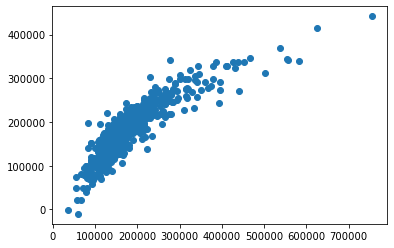

In [39]:
plt.scatter(y_test, predictions)

#### Another way to gauge accuracy 
is to print an accuracy score for this model. 

In [40]:
print("Score:", lm.score(x_test, y_test))

Score: 0.7645764306315787


#### This means this model is accurate    72 % of the time. 
The next way to determine model fit is to look at the error terms. This is just another way to quantify the residuals - how close is this predicted data from the real data? There are many different mathematical ways to examine error, but we will look at mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE). There are no cut-off values when interpreting error scores, because each model with different variables and different units for those variables will generate radically different error values. The main thing to know about interpreting error is that the smaller the error value, the better, and they range from zero to infinity. We want as close to zero as we can get.

In [41]:
###Mean Absolute Error (MAE)
##This is exactly what it sounds like - the average amount of error between the prediction and the real data. It's a nice one to use because it's pretty simple to understand. To get it, utilize the metrics package from sklearn and the mean_absolute_error() function:


metrics.mean_absolute_error(y_test, predictions)

25885.80006929089

In [42]:
metrics.mean_absolute_error(y_test, predictions)

25885.80006929089

#### as close to zero 
Mean Squared Error (MSE)
This is the square of the absolute error from above. It's a good one to use because it takes into account large amounts of error, which often happens in the real world. we'll get it with the mean_squared_error() function from the sklearn metrics package:


In [43]:
metrics.mean_squared_error(y_test, predictions)

1646872007.2434084

#### Root Mean Squared Error (RMSE)
This one is the square root of the mean squared error you saw above. It is probably the most popular. We will need to utilize the numpy sqrt() function to get the square root of the mean_squared_error() function used above:

In [44]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

40581.67082863159

#### add school rating as outside data set   - niche.com)  crime statistics, rating for the area, apply it to home, close proximity to - remove neighborhoods - build new dataset. material prices affect newhome starts and remodel. lack of contractors in service industry affects. worked to build generic model that could be applied to rest of country. tried to apply to region. schools, hospitals, etc. apply this lens to different populations. like a lens you look through.  
#http://www.city-data.com/crime/crime-Ames-Iowa.html

## Create random latitude and longitude, merge with recoded housing datasets x and y

In [45]:
#randomlat = pd.read_csv("C:/Users/Marcy/Documents/Entity Coursework/Final Project/random_lat_lon.csv")
#len(randomlat)

### Merge 

In [46]:
#len(x)

In [47]:
#housemerge = (x.merge(y, how='cross').merge(randomlat, how= 'cross'))
#houseMerge.head()
### This gives a memory error - it's unable to allocate enough memory to store ### 

In [48]:
#housemerge = (y.merge(random_lat_long, how='cross'))
#houseMerge.head()

In [52]:
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,SalePriceRange
0,60,3,65.0,8450,1,4,0,5,7,5,...,0,61,0,0,0,0,0,4,208500,None
1,20,3,80.0,9600,1,2,0,2,6,8,...,298,0,0,0,0,0,0,4,181500,150000-200000
2,60,3,68.0,11250,1,4,0,5,7,5,...,0,42,0,0,0,0,0,4,223500,None
3,70,3,60.0,9550,1,0,0,5,7,5,...,0,35,272,0,0,0,0,0,140000,100000-150000
4,60,3,84.0,14260,1,2,0,5,8,5,...,192,84,0,0,0,0,0,4,250000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,4,0,5,6,5,...,0,40,0,0,0,0,0,4,175000,150000-200000
1456,20,3,85.0,13175,1,4,0,2,6,6,...,349,0,0,0,0,0,0,4,210000,None
1457,70,3,66.0,9042,1,4,0,5,7,9,...,0,60,0,0,0,0,2500,4,266500,None
1458,20,3,68.0,9717,1,4,0,2,5,6,...,366,0,112,0,0,0,0,4,142125,100000-150000
